#### **This code downloads JSON for warning letters from [FDA website](https://www.fda.gov/inspections-compliance-enforcement-and-criminal-investigations/compliance-actions-and-activities/warning-letters) and then extracts various features such as posted date, company name, issuing office, subject, warning letter links, response letter links and closeout letter links etc. following which it uses [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) to download text from the links and creates a .csv dataframe**

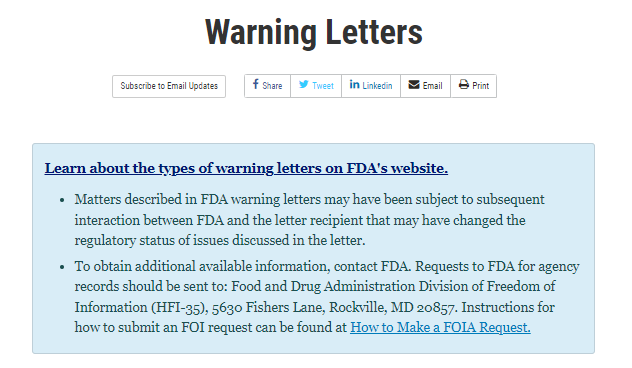


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from bs4 import BeautifulSoup as bs
import requests
import regex as re
import unicodedata

#Downloading the initial json file
import time
import hashlib
import json
import urllib.request
from urllib.request import urlopen, Request

In [2]:
url1 = 'https://www.fda.gov/datatables/views/ajax?search_api_fulltext=&search_api_fulltext_issuing_office=&field_letter_issue_datetime=All&field_change_date_closeout_letter=&field_change_date_response_letter=&field_change_date_2=All&field_letter_issue_datetime_2=&draw=3&columns[0][data]=0&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=7&columns[7][name]=&columns[7][searchable]=true&columns[7][orderable]=false&columns[7][search][value]=&columns[7][search][regex]=false&start=0&length=4000&search[value]=&search[regex]=false&_drupal_ajax=1&_wrapper_format=drupal_ajax&pager_element=0&view_args=&view_base_path=inspections-compliance-enforcement-and-criminal-investigations/compliance-actions-and-activities/warning-letters/datatables-data&view_display_id=warning_letter_solr_block&view_dom_id=57b3b8c94de1ad4be22fc4437a6300bf7eb8f9b4916b133091c1c76d8e411255&view_name=warning_letter_solr_index&view_path=/inspections-compliance-enforcement-and-criminal-investigations/compliance-actions-and-activities/warning-letters&total_items=2944&_=1649826180793'
#URL where JSON file containing thedata is stored

response = urlopen(url1).read()

# Code to download the JSON file
json_path = url1
json_path1 = json_path.replace("'", "")
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".json", 'wb')
    file.write(response.read())
    file.close()
 
download_file(json_path1, "warning_letter")

In [3]:
df = pd.read_json("./warning_letter.json") # reading the downloaded JSON file

In [4]:
df =  df["data"]

In [5]:
df = pd.DataFrame(dict(zip(df.index, df.values))).T # extracting relavant informartion in a dataframe format from JSON

In [6]:
df.head()

,0,1,2,3,4,5,6,7
0,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-30T04:00:00Z"">03/30/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,,,
1,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-25T04:00:00Z"">03/25/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,,,
2,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-18T04:00:00Z"">03/18/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,,,
3,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-30T04:00:00Z"">03/30/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,,,
4,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-01-21T05:00:00Z"">01/21/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,,,


In [7]:
# Renaming column names same as they are available on the website

cols = ["posted_date", "letter_issue_date", "company_name_and_link", "issuing_office",\
        "subject","response_letter_date_and_link","closeout_letter_date_and_link", "check"]

df.columns = cols

In [8]:
# Replacing blanks in response_letter and closeout_letter with NAN Values in the df
df["response_letter_date_and_link"][df["response_letter_date_and_link"].str.contains("href") == False] = np.NaN
df["closeout_letter_date_and_link"][df["closeout_letter_date_and_link"].str.contains("href") == False] = np.NaN

In [9]:
df["check"].str.contains('\w', regex=True).sum()

0

In [10]:
df.drop(["check"], axis=1, inplace = True)

In [11]:
df.head()

,posted_date,letter_issue_date,company_name_and_link,issuing_office,subject,response_letter_date_and_link,closeout_letter_date_and_link
0,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-30T04:00:00Z"">03/30/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN
1,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-25T04:00:00Z"">03/25/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN
2,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-18T04:00:00Z"">03/18/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN
3,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-03-30T04:00:00Z"">03/30/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN
4,"<time datetime=""2022-04-12T13:20:00Z"">04/12/20...","<time datetime=""2022-01-21T05:00:00Z"">01/21/20...","<a href=""/inspections-compliance-enforcement-a...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN


In [12]:
# Code to extract date from html Soup
def date_extract(x):
    soup = bs(x, "lxml")
    date = soup.find("time").text.strip()
    return date

In [13]:
# COde to extract Company Name and Link
def company_name_and_link(x):
    soup = bs(x, "lxml")
    company_name = soup.find("a").text.strip()
    link = "https://www.fda.gov" + soup.find("a")["href"].strip()
    return company_name, link

In [14]:
df[["posted_date", "letter_issue_date"]] = df[["posted_date", "letter_issue_date"]].applymap(lambda x: date_extract(x))

In [15]:
df["company_name_and_link"] = df["company_name_and_link"].apply(company_name_and_link)

In [16]:
df['company_name'], df['warning_letter_link'] = zip(*df["company_name_and_link"])

In [17]:
df[["issuing_office", "subject"]] = df[["issuing_office", "subject"]].applymap(lambda x: x.strip())

In [18]:
df[df["response_letter_date_and_link"].notnull()]

,posted_date,letter_issue_date,company_name_and_link,issuing_office,subject,response_letter_date_and_link,closeout_letter_date_and_link,company_name,warning_letter_link
239,12/07/2021,11/09/2021,"(Synaptent, LLC, https://www.fda.gov/inspectio...",Office of Human and Animal Food Operations-East 6,New Drug/Misbranded,"<a href=""/inspections-compliance-enforcement-a...",NaN,"Synaptent, LLC",https://www.fda.gov/inspections-compliance-enf...
977,09/29/2020,09/09/2020,"(Foothills Professional Pharmacy, LTD, https:/...",Division of Pharmaceutical Quality Operations IV,Compounding Pharmacy/Adulterated Drug Products,"<a href=""/inspections-compliance-enforcement-a...",NaN,"Foothills Professional Pharmacy, LTD",https://www.fda.gov/inspections-compliance-enf...
1685,09/03/2019,08/26/2019,"(Absonutrix, LLC, https://www.fda.gov/inspecti...",Division of Human and Animal Food Operations E...,Dietary Supplement/Adulterated<br />,"<a href=""/inspections-compliance-enforcement-a...",NaN,"Absonutrix, LLC",https://www.fda.gov/inspections-compliance-enf...
1705,08/20/2019,07/22/2019,"(Almark Foods Inc, https://www.fda.gov/inspect...",Division of Human and Animal Food Operations E...,Food/Prepared Packed or Held Under Insanitary ...,"<a href=""/inspections-compliance-enforcement-a...",NaN,Almark Foods Inc,https://www.fda.gov/inspections-compliance-enf...
2044,10/30/2018,10/18/2018,(Custom RX LLC dba Custom Rx Pharmacy and Well...,Detroit District Office,Custom RX LLC dba Custom Rx Pharmacy and Welln...,"<a href=""/inspections-compliance-enforcement-a...","<a href=""/inspections-compliance-enforcement-a...",Custom RX LLC dba Custom Rx Pharmacy and Welln...,https://www.fda.gov/inspections-compliance-enf...
2176,07/24/2018,07/19/2018,"(Niche Pharmaceuticals, Inc, https://www.fda.g...",Dallas District Office,Unapproved New Drugs/Misbranded,"<a href=""/inspections-compliance-enforcement-a...","<a href=""/inspections-compliance-enforcement-a...","Niche Pharmaceuticals, Inc",https://www.fda.gov/inspections-compliance-enf...


In [19]:
def letter_date_and_link(x):
    soup = bs(x, "lxml")
    date = soup.find("a").text.strip()
    link = "https://www.fda.gov" + soup.find("a")["href"].strip()
    return date, link

**Getting Response Letter Date and Link**

In [20]:
get_rows_response_letter = df["response_letter_date_and_link"].notnull()

In [21]:
df["response_letter_date_and_link"][get_rows_response_letter] = df["response_letter_date_and_link"][get_rows_response_letter].\
apply(letter_date_and_link)

In [22]:
df[['response_date', 'response_link']] = df[get_rows_response_letter].apply(lambda x:x.response_letter_date_and_link,\
                                                            result_type='expand', axis=1)

**Getting Closeout Letter date and Links**

In [23]:
get_rows_closeout_letter = df["closeout_letter_date_and_link"].notnull()

In [24]:
df["closeout_letter_date_and_link"][get_rows_closeout_letter] = df["closeout_letter_date_and_link"][get_rows_closeout_letter].\
apply(letter_date_and_link)

In [25]:
df[['closeout_date', 'closeout_link']] = df[get_rows_closeout_letter].apply(lambda x:x.closeout_letter_date_and_link,\
                                                            result_type='expand', axis=1)

In [26]:
df.head()

,posted_date,letter_issue_date,company_name_and_link,issuing_office,subject,response_letter_date_and_link,closeout_letter_date_and_link,company_name,warning_letter_link,response_date,response_link,closeout_date,closeout_link
0,04/12/2022,03/30/2022,"(kubapharm.com, https://www.fda.gov/inspection...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN,kubapharm.com,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN
1,04/12/2022,03/25/2022,"(Fliq Vapor LLC, https://www.fda.gov/inspectio...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Fliq Vapor LLC,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN
2,04/12/2022,03/18/2022,"(Public Bru Inc., https://www.fda.gov/inspecti...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Public Bru Inc.,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN
3,04/12/2022,03/30/2022,"(premiumlightsupplier.com, https://www.fda.gov...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN,premiumlightsupplier.com,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN
4,04/12/2022,01/21/2022,"(Jungle Nation Inc., https://www.fda.gov/inspe...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Jungle Nation Inc.,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN


**Creating a Scrapper to scrape through links and extract text**

In [27]:
def div_scrapper(x):
    
    scrapped_text = ""
    r = requests.get(x)
    soup = bs(r.text, "lxml")
    find_div = soup.find("div", class_ = "col-md-8 col-md-push-2")
    scrapped_text = re.sub(r'\n+', '\n', unicodedata.normalize("NFKD", find_div.text))
    scrapped_text = scrapped_text.strip()
    
    return scrapped_text

In [28]:
# creating final dataframe and writing it to a csv file
df["warning_letter_text"] = df["warning_letter_link"].apply(div_scrapper)
df['response_text'] = df[get_rows_response_letter]["response_link"].apply(div_scrapper)
df['closeout_text'] = df[get_rows_closeout_letter]["closeout_link"].apply(div_scrapper)
df.to_csv("warning_letters.csv")

In [29]:
df

,posted_date,letter_issue_date,company_name_and_link,issuing_office,subject,response_letter_date_and_link,closeout_letter_date_and_link,company_name,warning_letter_link,response_date,response_link,closeout_date,closeout_link,warning_letter_text,response_text,closeout_text
0,04/12/2022,03/30/2022,"(kubapharm.com, https://www.fda.gov/inspection...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN,kubapharm.com,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Product:\nDrugs \n ...,NaN,NaN
1,04/12/2022,03/25/2022,"(Fliq Vapor LLC, https://www.fda.gov/inspectio...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Fliq Vapor LLC,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nVIA UPS and Electronic Mail\...,NaN,NaN
2,04/12/2022,03/18/2022,"(Public Bru Inc., https://www.fda.gov/inspecti...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Public Bru Inc.,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nVIA UPS and Electronic Mail\...,NaN,NaN
3,04/12/2022,03/30/2022,"(premiumlightsupplier.com, https://www.fda.gov...",Center for Drug Evaluation and Research | CDER,Unlawful Sale of Schedule II Stimulants to Con...,NaN,NaN,premiumlightsupplier.com,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Product:\nDrugs \n ...,NaN,NaN
4,04/12/2022,01/21/2022,"(Jungle Nation Inc., https://www.fda.gov/inspe...",Center for Tobacco Products,Family Smoking Prevention and Tobacco Control ...,NaN,NaN,Jungle Nation Inc.,https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nVIA UPS and Electronic Mail\...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,01/23/2017,01/11/2017,"(Walter's Pharmacy, Inc., https://www.fda.gov/...",Philadelphia District Office,Compounding Pharmacy/Adulteration/Misbranding,NaN,"(05/17/2018, https://www.fda.gov/inspections-c...","Walter's Pharmacy, Inc.",https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,05/17/2018,https://www.fda.gov/inspections-compliance-enf...,Delivery Method:\nCertified Mail\n ...,NaN,"Recipient:\nWalter's Pharmacy, Inc.\nUnited St..."
2940,01/17/2017,01/10/2017,"(Aspen Hills, Inc., https://www.fda.gov/inspec...",Kansas City District Office,"CGMP/Food/Prepared, Packed or Held Under Insan...",NaN,NaN,"Aspen Hills, Inc.",https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nUPS Overnight Delivery\n ...,NaN,NaN
2941,01/17/2017,01/06/2017,"(Sato Yakuhin Kogyo Co., Ltd., https://www.fda...",Center for Drug Evaluation and Research,CGMP/Finished Pharmaceuticals/Adulterated,NaN,NaN,"Sato Yakuhin Kogyo Co., Ltd.",https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nUPS\n ...,NaN,NaN
2942,01/17/2017,01/10/2017,"(Hawaiian Ono Services, Inc., https://www.fda....",San Francisco District Office,Seafood HACCP/CGMP for Foods/Adulterated/Insan...,NaN,NaN,"Hawaiian Ono Services, Inc.",https://www.fda.gov/inspections-compliance-enf...,NaN,NaN,NaN,NaN,Delivery Method:\nUnited Parcel Service\n ...,NaN,NaN
